# DB Scan

In [5]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

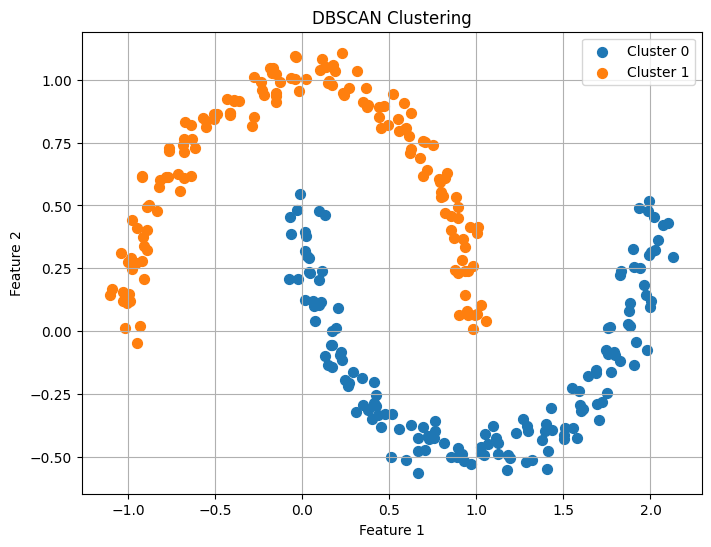

In [7]:
# Step 1: Generate a sample dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps is the neighborhood radius, min_samples is the minimum points in a cluster
labels = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Plot noise points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], s=50, color='red', label='Noise')
    else:
        # Plot clusters
        plt.scatter(X[labels == label, 0], X[labels == label, 1], s=50, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [8]:
Y = labels  # The cluster labels from DBSCAN

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Dictionary of classifiers to evaluate
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Step 4: Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 100.00%
Logistic Regression Accuracy: 96.67%
SVM Accuracy: 96.67%
KNN Accuracy: 100.00%
Naive Bayes Accuracy: 96.67%
Decision Tree Accuracy: 95.00%
AdaBoost Accuracy: 98.33%
Gradient Boosting Accuracy: 100.00%
XGBoost Accuracy: 100.00%


In [11]:
# END